In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [2]:
df = pd.read_csv('./df_분리/건물_30년 이상.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
1,영등포구,2016-01-02,55.90,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,33,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,28500
2,서대문구,2016-01-03,66.12,6,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,47,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,15200
3,강남구,2016-01-04,25.27,3,1918.760010,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1190.35,99.6,177.148845,0.14,1074.70,0.7,51000
4,강동구,2016-01-04,41.62,2,1918.760010,0.34,26.9,9894,1.77,2.03,...,1.50,33,83.3,1190.35,99.6,177.148845,0.14,1074.70,0.7,41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65821,서대문구,2022-12-30,54.02,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,48,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,53459
65822,노원구,2022-12-31,41.30,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,39000
65823,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000
65824,강남구,2022-12-31,76.79,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,43,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,184000


In [3]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', 'GDP대비가계부채비율', 
         '환율종가', 'EPU', 'LTV', '물건금액(만원)']]

In [4]:
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,GDP대비가계부채비율,환율종가,EPU,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,0.34,83.3,1175.45,177.148845,0.7,87000
1,영등포구,2016-01-02,55.90,3,0.34,83.3,1175.45,177.148845,0.7,28500
2,서대문구,2016-01-03,66.12,6,0.34,83.3,1175.45,177.148845,0.7,15200
3,강남구,2016-01-04,25.27,3,0.34,83.3,1190.35,177.148845,0.7,51000
4,강동구,2016-01-04,41.62,2,0.34,83.3,1190.35,177.148845,0.7,41000
...,...,...,...,...,...,...,...,...,...,...
65821,서대문구,2022-12-30,54.02,2,4.10,105.0,1260.92,169.662386,0.4,53459
65822,노원구,2022-12-31,41.30,12,4.10,105.0,1260.92,169.662386,0.4,39000
65823,송파구,2022-12-31,100.82,1,4.10,105.0,1260.92,169.662386,0.0,185000
65824,강남구,2022-12-31,76.79,2,4.10,105.0,1260.92,169.662386,0.0,184000


In [5]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [6]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [7]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# DT 모델

In [8]:
# dt 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.020668808092311704
Test set RMSE: 0.14376650546045733
Test set r2_score : 0.7925222051147144


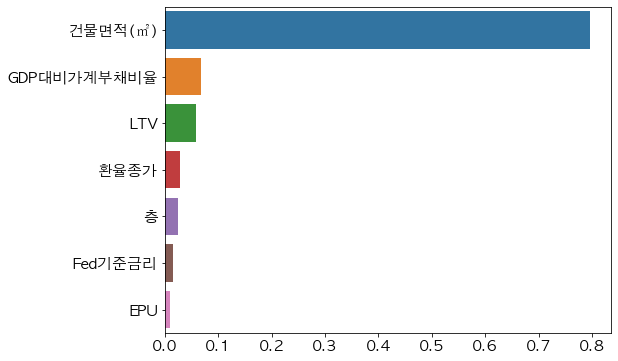

In [11]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# RF 모델

In [12]:
# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.014809555399862515
Test set RMSE: 0.12169451672060871
Test set r2_score : 0.8513386024064975


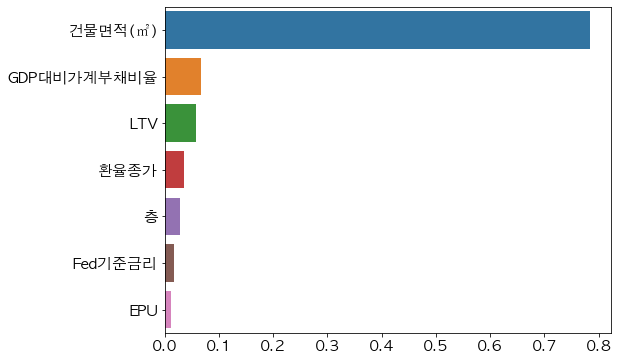

In [13]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGB 모델

In [14]:
# 랜덤 포레스트 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.015468120890601442
Test set RMSE: 0.12437090049767044
Test set r2_score : 0.8447277850242954


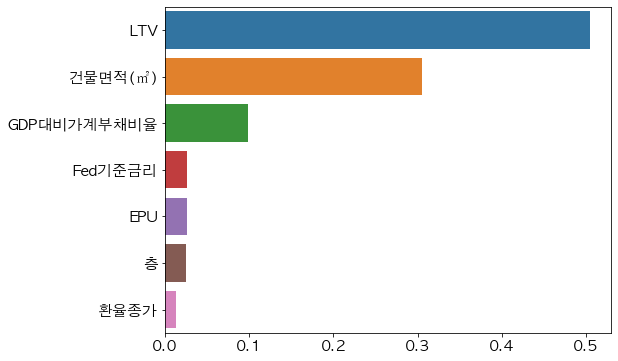

In [15]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()